In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[0]


In [6]:
single_image.shape


(28, 28)

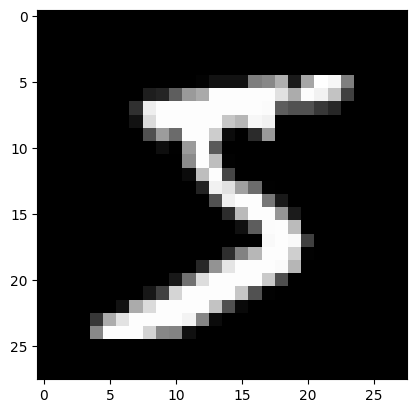

In [7]:

plt.imshow(single_image,cmap='gray')

In [8]:
y_train.shape

(60000,)

In [9]:
X_train.min()

0

In [10]:
X_train.max()

255

In [11]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [12]:
X_train_scaled.min()

0.0

In [13]:
X_train_scaled.max()

1.0

In [15]:
y_train[0]

5

In [16]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [17]:
type(y_train_onehot)

numpy.ndarray

In [18]:
y_train_onehot.shape


(60000, 10)

In [19]:
single_image = X_train[500]


kishor kumar - 212223240072


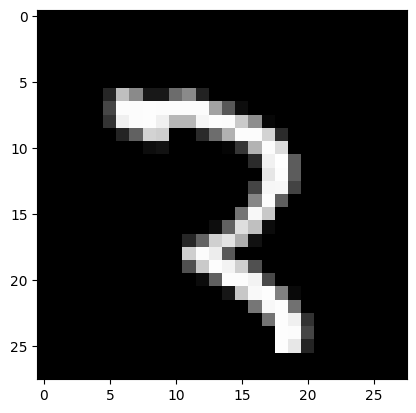

In [33]:
plt.imshow(single_image,cmap='gray')
print('kishor kumar - 212223240072')


In [21]:
y_train_onehot[500]


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [22]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)


In [23]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [24]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │         173,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 176,170 (688.16 KB)

 Trainable params: 176,170 (688.16 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,batch_size=64,validation_data=(X_test_scaled,y_test_onehot))


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9890 - loss: 0.0345 - val_accuracy: 0.9856 - val_loss: 0.0427
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9930 - loss: 0.0232 - val_accuracy: 0.9837 - val_loss: 0.0481
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9939 - loss: 0.0196 - val_accuracy: 0.9849 - val_loss: 0.0490
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.9951 - loss: 0.0154 - val_accuracy: 0.9840 - val_loss: 0.0506
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.9960 - loss: 0.0126 - val_accuracy: 0.9868 - val_loss: 0.0454


In [38]:
metrics = pd.DataFrame(model.history.history)


In [39]:
metrics.head()



,accuracy,loss,val_accuracy,val_loss
0,0.989050,0.035101,0.9856,0.042726
1,0.991750,0.027097,0.9837,0.048141
2,0.993083,0.021938,0.9849,0.048996
3,0.994317,0.017631,0.9840,0.050631
4,0.995433,0.014218,0.9868,0.045412


kishor kumar -212223240072


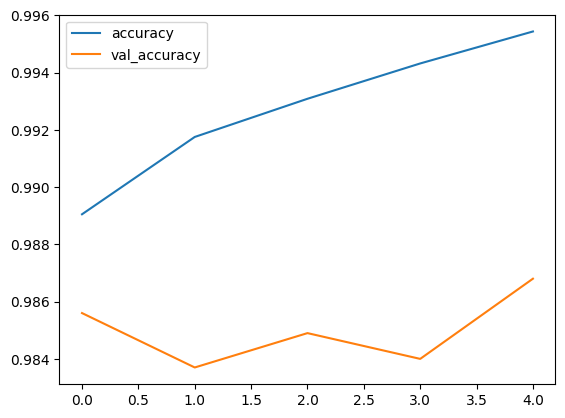

In [40]:
metrics[['accuracy','val_accuracy']].plot()
print('kishor kumar -212223240072')

kishor kumar -212223240072


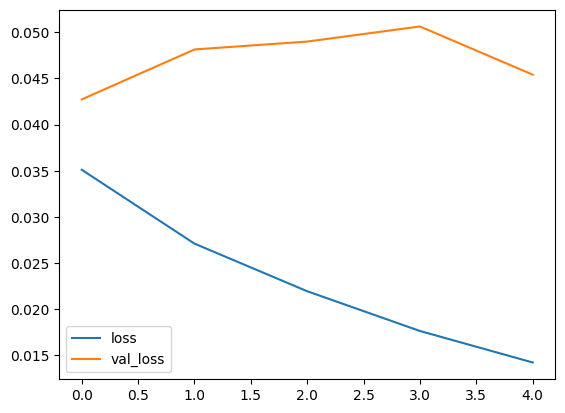

In [45]:
metrics[['loss','val_loss']].plot()
print('kishor kumar -212223240072')

In [47]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [42]:
print(confusion_matrix(y_test,x_test_predictions))


[[ 968    0    2    1    0    3    3    1    2    0]
 [   0 1132    0    1    0    0    1    1    0    0]
 [   0    2 1015    2    1    0    1    7    4    0]
 [   0    0    1  996    0    7    0    4    2    0]
 [   2    0    0    0  972    0    4    0    2    2]
 [   0    0    0    6    0  883    3    0    0    0]
 [   1    3    2    0    1    2  947    0    2    0]
 [   0    2    7    1    0    0    0 1011    3    4]
 [   3    1    2    0    1    2    1    2  961    1]
 [   2    2    0    1   11    5    0    3    2  983]]


In [43]:
print(classification_report(y_test,x_test_predictions))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [65]:
img = image.load_img('d3.jpg')


In [66]:
type(img)


PIL.Image.Image

In [67]:
img = image.load_img('d3.jpg')


In [68]:
img_tensor = tf.convert_to_tensor(np.asarray(img))


In [69]:
img_28 = tf.image.resize(img_tensor,(28,28))


In [70]:
img_28_gray = tf.image.rgb_to_grayscale(img_28)


In [71]:
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [72]:
x_single_prediction = np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [73]:
print(x_single_prediction)

[5]


kishor kumar -212223240072


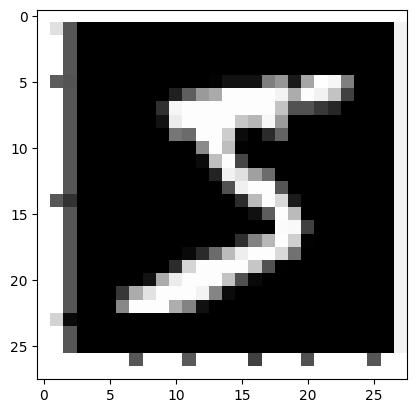

In [75]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')
print('kishor kumar -212223240072')

In [76]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [77]:
x_single_prediction = np.argmax(model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [78]:
print(x_single_prediction)


[5]
